https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

Problem Statement:

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Target:

Need to perform clustering to summarize customer segments.

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from datetime import datetime, date
from dateutil.relativedelta import relativedelta

#Ignore Depreciation Warnings
import warnings
warnings.simplefilter("ignore")

# Performing initial analysis

In [89]:
df = pd.read_csv('marketing_campaign.csv', sep=r'\t', engine='python')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [90]:
# Get dimensions of dataset
df.shape

(2240, 29)

In [91]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [92]:
df.isnull().sum() # or df.isna().sum() 

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [93]:
df['Income'].fillna(df['Income'].mean(), inplace = True)
print(df.isnull().sum())
#df = df.dropna()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [94]:
df.dtypes # or df.info()

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [95]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [96]:
# check the duplicate values
df.duplicated().sum()

0

In [97]:
# Check the skewed data
df.skew()

ID                      0.039832
Year_Birth             -0.349944
Income                  6.799965
Kidhome                 0.635288
Teenhome                0.407115
Recency                -0.001987
MntWines                1.175771
MntFruits               2.102063
MntMeatProducts         2.083233
MntFishProducts         1.919769
MntSweetProducts        2.136081
MntGoldProds            1.886106
NumDealsPurchases       2.418569
NumWebPurchases         1.382794
NumCatalogPurchases     1.880989
NumStorePurchases       0.702237
NumWebVisitsMonth       0.207926
AcceptedCmp3            3.291705
AcceptedCmp4            3.241574
AcceptedCmp5            3.291705
AcceptedCmp1            3.555444
AcceptedCmp2            8.472093
Complain               10.188972
Z_CostContact           0.000000
Z_Revenue               0.000000
Response                1.971555
dtype: float64

We can see that the Z_revenue and Z_CostContact have 0 skew, so they have same values throughout. Also the complain is the column with the highest skewed value. This can be observed more in following histograms. So now, the columns Z_revenue and Z_CostContact will be removed. Also the Complain column has a very large skew, and it mostly has values 0 (from table statistics), so we will remove this column too

In [98]:
df = df.drop(columns=['Z_Revenue','Z_CostContact','Complain'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# Performing EDA

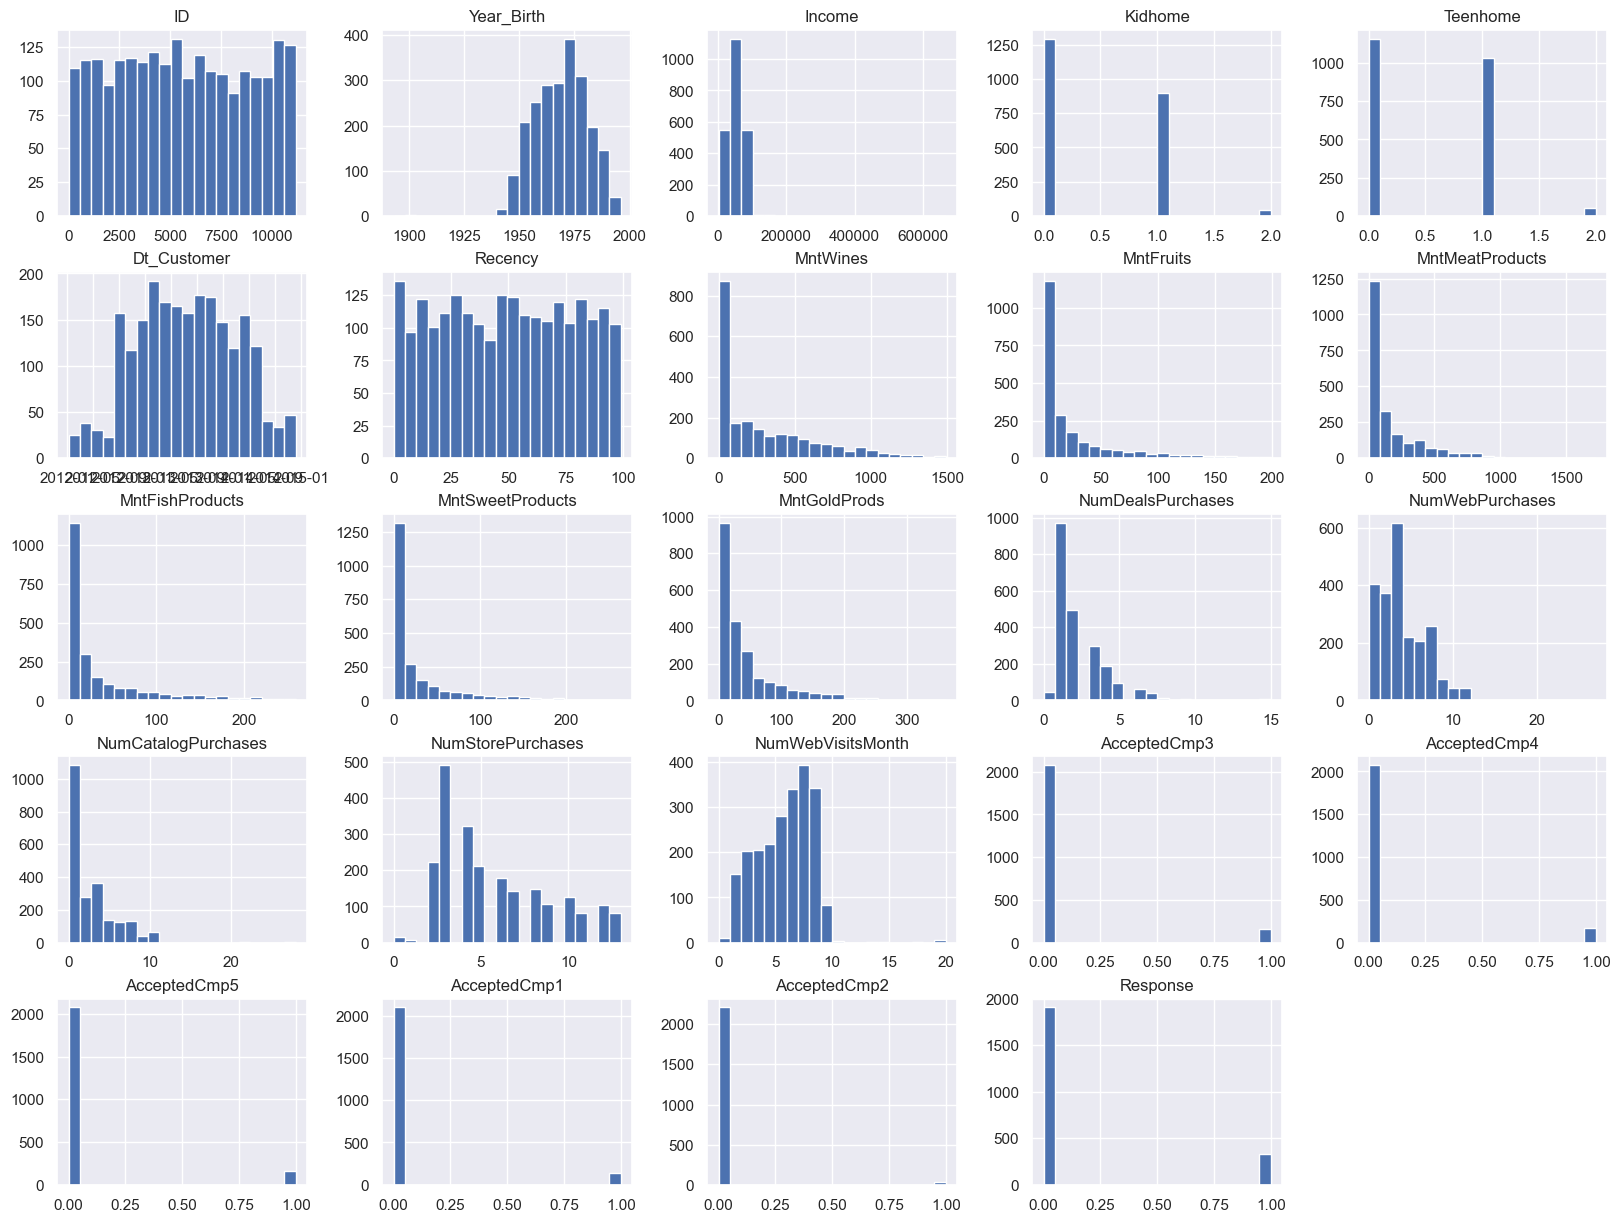

In [99]:
# Plotting Histogram to observe frequency distribution of column values
df.hist(bins=20, figsize=(20,15))
plt.show()

In [100]:
# Computing correlation matrix
df.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
ID,1.000000,0.000028,0.013036,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.018924,-0.003440,-0.014927,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,-0.021968
Year_Birth,0.000028,1.000000,-0.160942,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,-0.145040,-0.121275,-0.128272,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,0.021325
Income,0.013036,-0.160942,1.000000,-0.425176,0.019018,-0.003946,0.576789,0.428747,0.577802,0.437497,...,0.380550,0.586725,0.526489,-0.549824,-0.016168,0.182791,0.334850,0.274921,0.087538,0.132756
Kidhome,0.002406,0.230176,-0.425176,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,-0.361647,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,-0.080008
Teenhome,-0.002580,-0.352111,0.019018,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.155500,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,-0.154446
Recency,-0.046524,-0.019871,-0.003946,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.010726,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,-0.198437
MntWines,-0.022878,-0.157773,0.576789,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,0.542265,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,0.247254
MntFruits,0.004600,-0.017917,0.428747,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,0.296735,0.487917,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,0.125289
MntMeatProducts,-0.004437,-0.030872,0.577802,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,0.293761,0.723827,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,0.236335
MntFishProducts,-0.024475,-0.041625,0.437497,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,0.293681,0.534478,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,0.111331


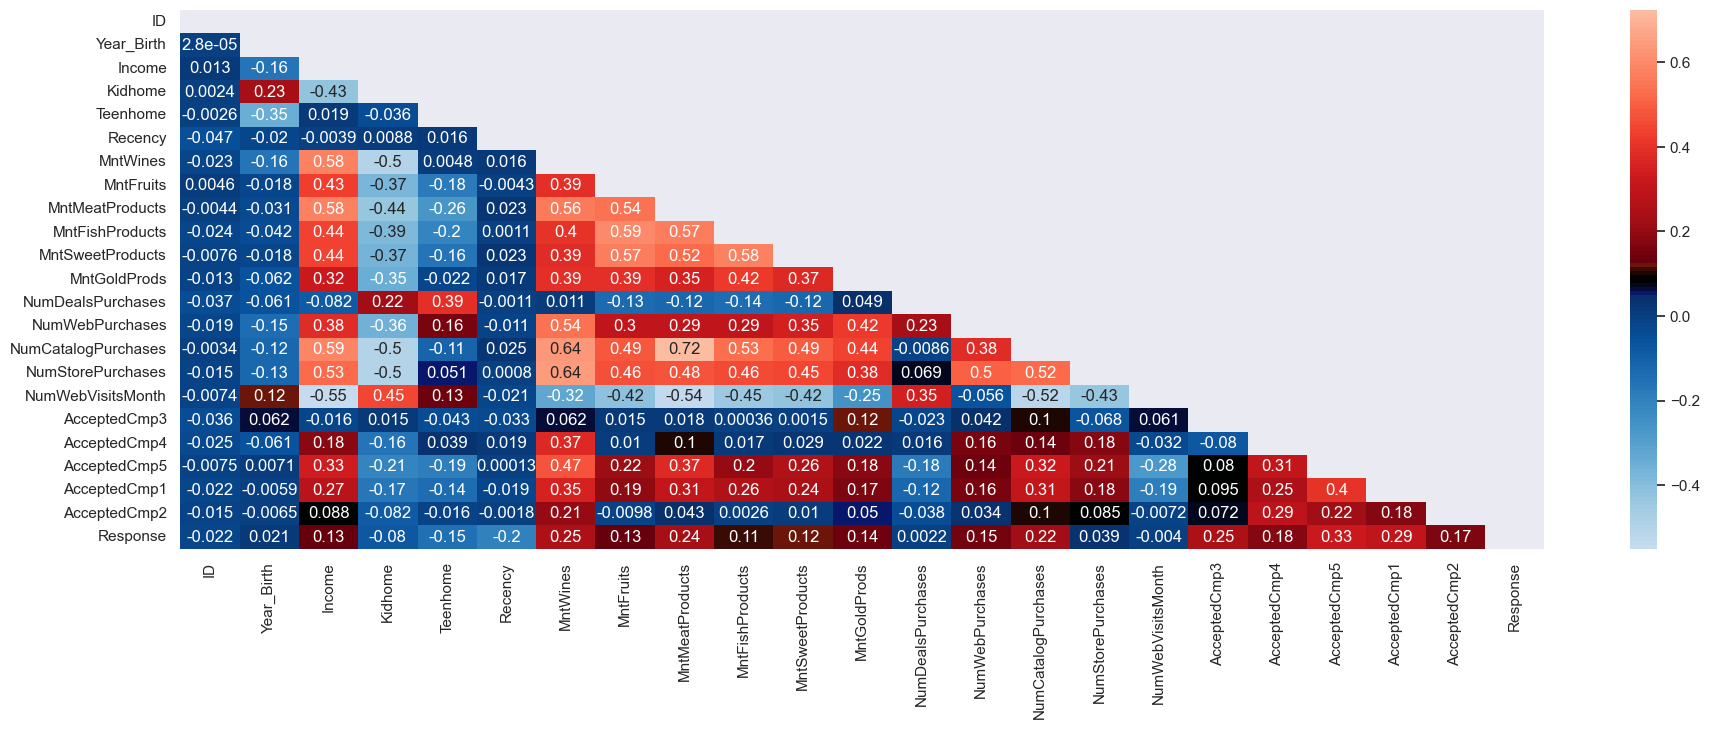

In [101]:
# We can better view the correlation using a diagonal heat map visualization

#  Initialize the figure and subplot axes
f, ax = plt.subplots(figsize=(22, 7)) #f = plt.figure(); ax = fig.add_subplot()

# Generate a mask for the upper triangle
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# create listedColormap
# https://stackoverflow.com/questions/64875534/how-to-create-a-custom-diverging-colormap-in-matplotlib
bottom = cm.get_cmap('Blues', 256)
top = cm.get_cmap('Reds_r', 256)
mycolormap = np.vstack((bottom(np.linspace(0.25, 1, 64)),
                        np.array([
                        [0.03137255, 0.08823529, 0.41960784, 1.],
                        [0.02137255, 0.04823529, 0.21960784, 1.],
                        [0.01137255, 0.02823529, 0.11960784, 1.],
                        [0.00037255, 0.00823529, 0.00960784, 1.],
                        #[0.00000255, 0.00000529, 0.00060784, 1.],
                        ])
                       ))
mycolormap = np.vstack((mycolormap,
                        np.array([
                        #[0.00060784, 0.00000529, 0.00000255, 1.],
                        [0.00960784, 0.00823529, 0.00037255, 1.],
                        [0.11960784, 0.02823529, 0.01137255, 1.],
                        [0.21960784, 0.04823529, 0.02137255, 1.],
                        [0.41960784, 0.08823529, 0.03137255, 1.],
                        ])
                       ))
mycolormap = np.vstack((mycolormap,
                        top(np.linspace(0, 0.75, 64)),
                       ))

low2hiColor = ListedColormap(mycolormap, name='low2hiColor')

sns.heatmap(corr, mask=mask,annot=True, cmap=low2hiColor)
plt.show()

# Perform Feature Engineering to Extract/Modify Attributes

The following transformations will be applied to extract new features:

1. Extract age of customer from 'Year_Birth'. Note: "Age" here represents the age at which customers enrolled with the company

2. Get number of days since customer enrolled in company 'Dt_Customer'

3. Convert Amount spent on items into percentages of item bought over total amount spent

4. Convert Number of different purchases made into percentages over total number of purchases made.

5. Convert columns 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5' into single column with values 1-5

6. Convert categorical variable 'Education' into ordinal variable by assigning prioratized values

7. Generalize Marital Status into 2 values [married/not married]

8. generate TARGET DEPENDENT variable IS_PARENT

9. Convert income datatype to int

In [102]:
df["Year_Birth"] = df['Dt_Customer'].dt.year-df["Year_Birth"]
df.rename(columns = {'Year_Birth':'Age'},inplace = True)
df["Age"].head()

0    55
1    60
2    48
3    30
4    33
Name: Age, dtype: int64

In [104]:
df['Years_Since_Customer'] = 2023 - df['Dt_Customer'].dt.year
df['Years_Since_Customer'].head()

0    11
1     9
2    10
3     9
4     9
Name: Years_Since_Customer, dtype: int64

In [106]:
df["Total_Amount_Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df["Total_Amount_Spent"].head()

0    1617
1      27
2     776
3      53
4     422
Name: Total_Amount_Spent, dtype: int64

In [108]:
df['MntWines_%'] = df["MntWines"]/df["Total_Amount_Spent"]
df['MntFruits_%'] = df["MntFruits"]/df["Total_Amount_Spent"]
df['MntMeatProducts_%'] = df["MntMeatProducts"]/df["Total_Amount_Spent"]
df['MntFishProducts_%'] = df["MntFishProducts"]/df["Total_Amount_Spent"]
df['MntSweetProducts_%'] = df["MntSweetProducts"]/df["Total_Amount_Spent"]
df['MntGoldProds_%'] = df["MntGoldProds"]/df["Total_Amount_Spent"]

df[['MntWines_%','MntFruits_%','MntMeatProducts_%','MntFishProducts_%','MntSweetProducts_%','MntGoldProds_%']].head()

,MntWines_%,MntFruits_%,MntMeatProducts_%,MntFishProducts_%,MntSweetProducts_%,MntGoldProds_%
0,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422
1,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222
2,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124
3,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340
4,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545


In [111]:
df['Total_Purchase_Count'] = df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
df['NumWebPurchases_%'] = df['NumWebPurchases']/df['Total_Purchase_Count']
df['NumCatalogPurchases_%'] = df['NumCatalogPurchases']/df['Total_Purchase_Count']
df['NumStorePurchases_%'] = df['NumStorePurchases']/df['Total_Purchase_Count']

df[['NumWebPurchases_%','NumCatalogPurchases_%','NumStorePurchases_%']].head()

,NumWebPurchases_%,NumCatalogPurchases_%,NumStorePurchases_%
0,0.363636,0.454545,0.181818
1,0.250000,0.250000,0.500000
2,0.400000,0.100000,0.500000
3,0.333333,0.000000,0.666667
4,0.357143,0.214286,0.428571


In [116]:
df['AccpetedCmp'] = df['AcceptedCmp1']+2*df['AcceptedCmp2']+3*df['AcceptedCmp3']+4*df['AcceptedCmp4']+5*df['AcceptedCmp5']
df['AccpetedCmp'].head(100)

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    4
97    0
98    1
99    0
Name: AccpetedCmp, Length: 100, dtype: int64

In [120]:
df['Education'].unique() # array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)
params = {'Basic':1,'Graduation':2,'2n Cycle':3,'Master':4,'PhD':5}
df['Education'] = df["Education"].replace(params)
df['Education'].head()

0    2
1    2
2    2
3    2
4    5
Name: Education, dtype: int64

In [124]:
df['Marital_Status'].unique() #array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone','Absurd', 'YOLO'], dtype=object)
df['Marital_Status'] = df['Marital_Status'].replace({'Single':1,'Together':2,'Married':3,'Divorced':4,'Widow':5,'Alone':6,'Absurd':7,'YOLO':8})
df['Marital_Status'].head()                                              

0    1
1    1
2    2
3    2
4    3
Name: Marital_Status, dtype: int64

In [125]:
df["Children"] = df["Kidhome"]+df["Teenhome"]
df['IS_PARENT'] = np.where(df["Children"]>0,1,0)

In [126]:
df['Income'] = df['Income'].astype(int)

# Check outliers